## Seaborn Release 0.9 Highlights

Full post on [Practical Business Python](http://pbpython.com/seaborn09.html)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Now that imports are done, enable inline display, set seaborn style and read in the file

In [2]:
%matplotlib inline

In [3]:
sns.set()

In [4]:
# File is in the data directory of the repo
df = pd.read_csv("https://raw.githubusercontent.com/chris1610/pbpython/master/data/MN_Traffic_Fatalities.csv")

In [5]:
df

,County,Twin_Cities,Pres_Election,Public_Transport(%),Travel_Time,Population,2012,2013,2014,2015,2016
0,Hennepin,Yes,Clinton,7.2,23.2,1237604,33,42,34,33,45
1,Dakota,Yes,Clinton,3.3,24.0,418432,19,19,10,11,28
2,Anoka,Yes,Trump,3.4,28.2,348652,25,12,16,11,20
3,St. Louis,No,Clinton,2.4,19.5,199744,11,19,8,16,19
4,Ramsey,Yes,Clinton,6.4,23.6,540653,19,12,12,18,15
5,Washington,Yes,Clinton,2.3,25.8,253128,8,10,8,12,13
6,Olmsted,No,Clinton,5.2,17.5,153039,2,12,8,14,12
7,Cass,No,Trump,0.9,23.3,28895,6,5,6,4,10
8,Pine,No,Trump,0.8,30.3,28879,14,7,4,9,10
9,Becker,No,Trump,0.5,22.7,33766,4,3,3,1,9


Create a basic scatter plot

<AxesSubplot:xlabel='2016', ylabel='Travel_Time'>

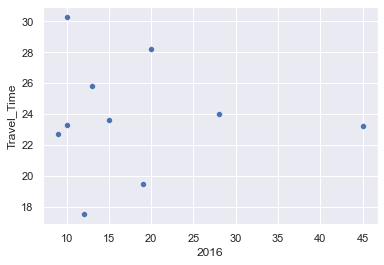

In [6]:
sns.scatterplot(x='2016', y='Travel_Time', data=df)

Try a different style based on the Pres_Election column

<AxesSubplot:xlabel='2016', ylabel='Travel_Time'>

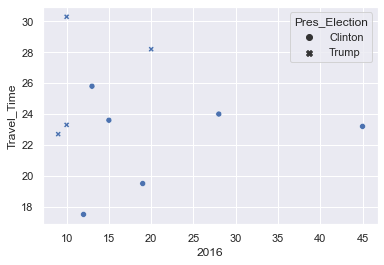

In [7]:
sns.scatterplot(x='2016', y='Travel_Time', style='Pres_Election', data=df)

Size of the marks can be controlled via the size parameter

<AxesSubplot:xlabel='2016', ylabel='Travel_Time'>

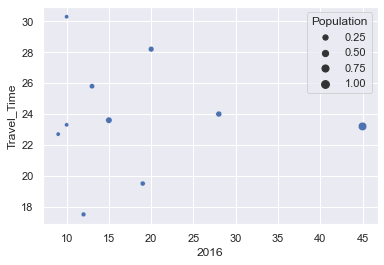

In [8]:
sns.scatterplot(x='2016', y='Travel_Time', size='Population', data=df)

Show size and hue

<AxesSubplot:xlabel='2016', ylabel='Travel_Time'>

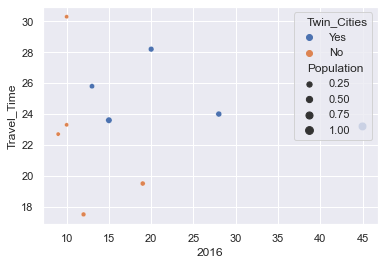

In [9]:
sns.scatterplot(x='2016', y='Travel_Time', size='Population', hue='Twin_Cities', data=df)

Need to create a tidy data frame in order to be most effective with the subsequent plots

In [10]:
df_melted = pd.melt(df, id_vars=['County', 'Twin_Cities', 'Pres_Election', 
                               'Public_Transport(%)', 'Travel_Time', 'Population'], 
                  value_vars=['2016', '2015', '2014', '2013', '2012'], 
                  value_name='Fatalities',
                  var_name=['Year']
                 )

Here's what the data looks like for Hennepin County

In [11]:
df_melted[df_melted.County == "Hennepin"]

,County,Twin_Cities,Pres_Election,Public_Transport(%),Travel_Time,Population,Year,Fatalities
0,Hennepin,Yes,Clinton,7.2,23.2,1237604,2016,45
10,Hennepin,Yes,Clinton,7.2,23.2,1237604,2015,33
20,Hennepin,Yes,Clinton,7.2,23.2,1237604,2014,34
30,Hennepin,Yes,Clinton,7.2,23.2,1237604,2013,42
40,Hennepin,Yes,Clinton,7.2,23.2,1237604,2012,33


Now that we have tidy data, let's plot some line plots

<AxesSubplot:xlabel='Year', ylabel='Fatalities'>

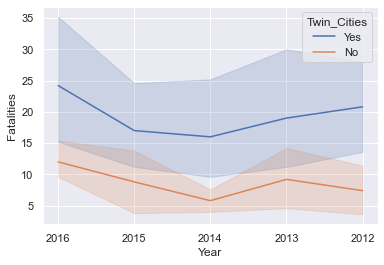

In [12]:
sns.lineplot(x='Year', y='Fatalities', data=df_melted, hue='Twin_Cities')

Disable the confidence interval

<AxesSubplot:xlabel='Year', ylabel='Fatalities'>

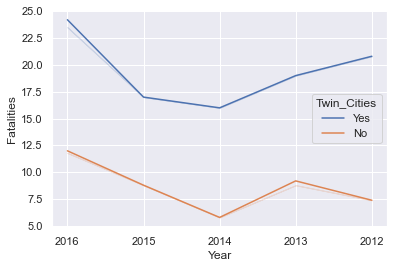

In [13]:
sns.lineplot(x='Year', y='Fatalities', data=df_melted, hue='Twin_Cities', ci=False)

relplot supports line and scatter plots on a FacetGrid.
relplots provide more plotting options than the basic line or scatter plot

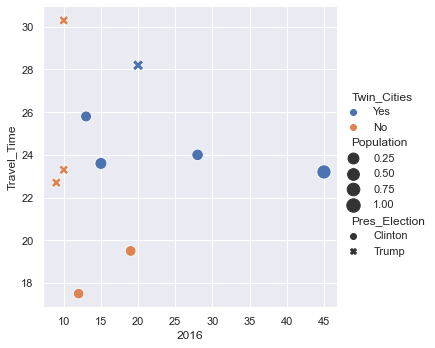

In [14]:
sns.relplot(x='2016', y='Travel_Time', size='Population', hue='Twin_Cities',
            sizes=(100, 200), style='Pres_Election', data=df, legend='brief')

In [15]:
# Here's how to review 2016 only data
df_melted.query("Year == '2016'")

,County,Twin_Cities,Pres_Election,Public_Transport(%),Travel_Time,Population,Year,Fatalities
0,Hennepin,Yes,Clinton,7.2,23.2,1237604,2016,45
1,Dakota,Yes,Clinton,3.3,24.0,418432,2016,28
2,Anoka,Yes,Trump,3.4,28.2,348652,2016,20
3,St. Louis,No,Clinton,2.4,19.5,199744,2016,19
4,Ramsey,Yes,Clinton,6.4,23.6,540653,2016,15
5,Washington,Yes,Clinton,2.3,25.8,253128,2016,13
6,Olmsted,No,Clinton,5.2,17.5,153039,2016,12
7,Cass,No,Trump,0.9,23.3,28895,2016,10
8,Pine,No,Trump,0.8,30.3,28879,2016,10
9,Becker,No,Trump,0.5,22.7,33766,2016,9


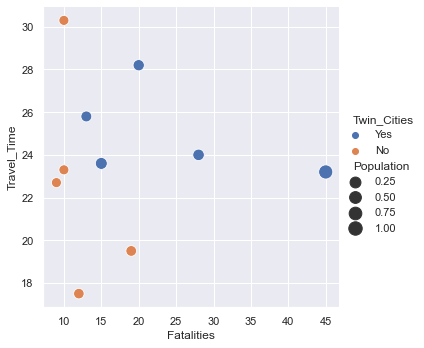

In [16]:
sns.relplot(x='Fatalities', y='Travel_Time', size='Population', hue='Twin_Cities',
            sizes=(100, 200), data=df_melted.query("Year == '2016'"))

We can split the data into two columns with the col keyword

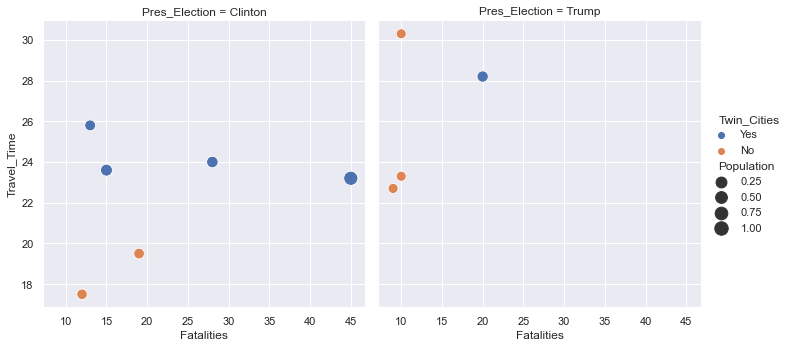

In [17]:
sns.relplot(x='Fatalities', y='Travel_Time', size='Population', hue='Twin_Cities',
            sizes=(100, 200), col='Pres_Election', data=df_melted.query("Year == '2016'"))

We can use kind='line' to create line plots on the FacetGrid

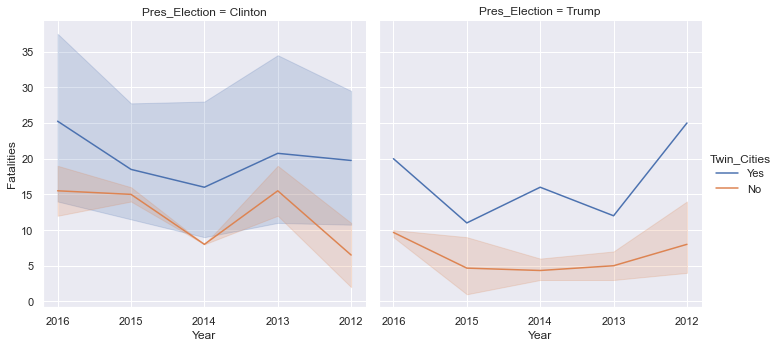

In [18]:
sns.relplot(x='Year', y='Fatalities', data=df_melted, kind='line', hue='Twin_Cities', col='Pres_Election')

This example has rows and columns

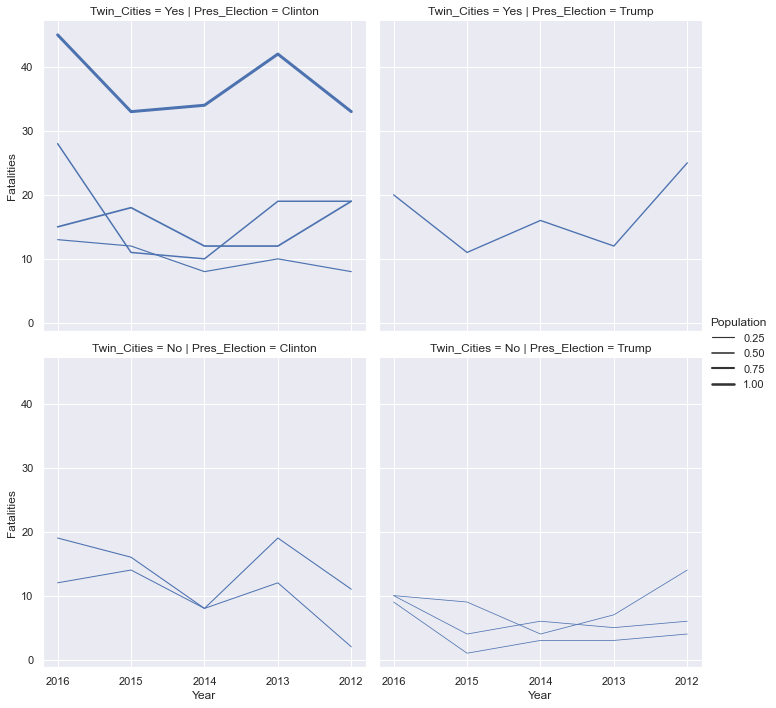

In [19]:
sns.relplot(x='Year', y='Fatalities', data=df_melted, kind='line', size='Population',
            row='Twin_Cities', col='Pres_Election')

factorplot is deprecated and replaced with catplot

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


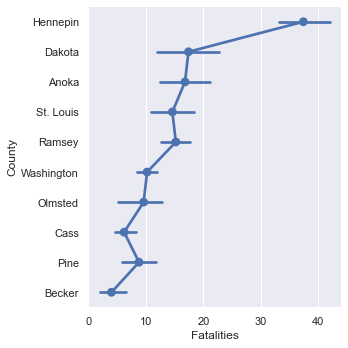

In [20]:
sns.factorplot(x='Fatalities', y='County', data=df_melted)

Here's how to use the category plot to replicate the factorplot

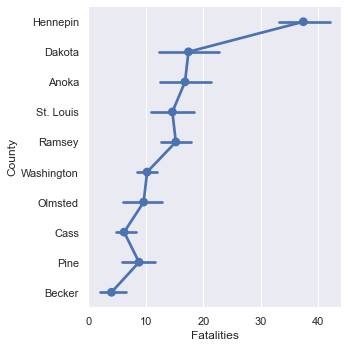

In [21]:
sns.catplot(x='Fatalities', y='County', data=df_melted, kind='point')

Try a boxplot

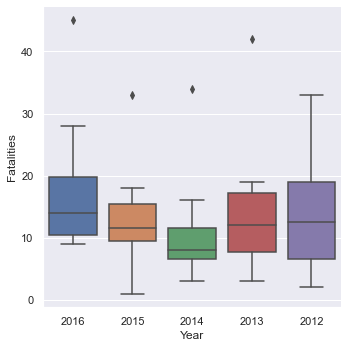

In [22]:
sns.catplot(x='Year', y='Fatalities', kind='box', data=df_melted)

A default catplot with two columns

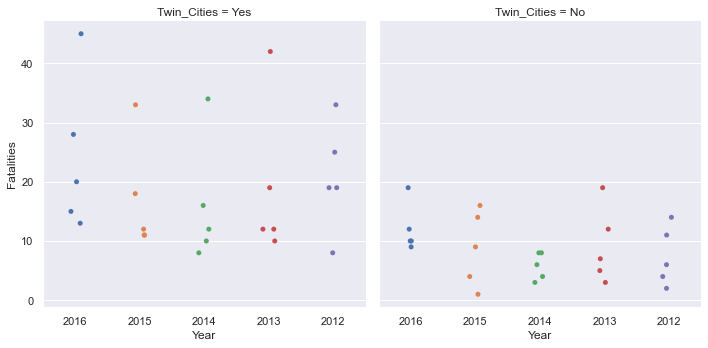

In [23]:
sns.catplot(x='Year', y='Fatalities', data=df_melted, col='Twin_Cities')

Change colors with hue

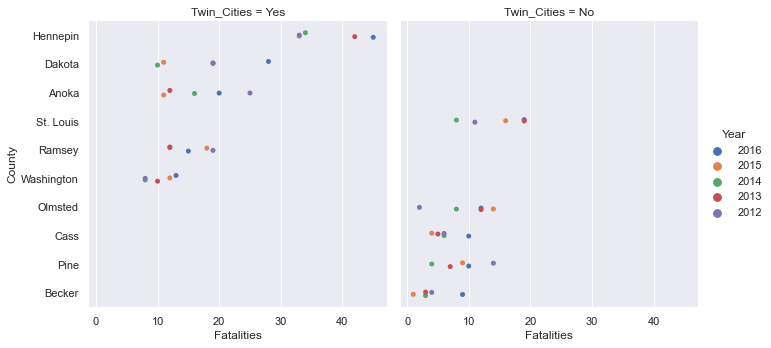

In [24]:
sns.catplot(y='County', x='Fatalities', data=df_melted, col='Twin_Cities', hue='Year')

Use a catplot with the newly named boxen plot

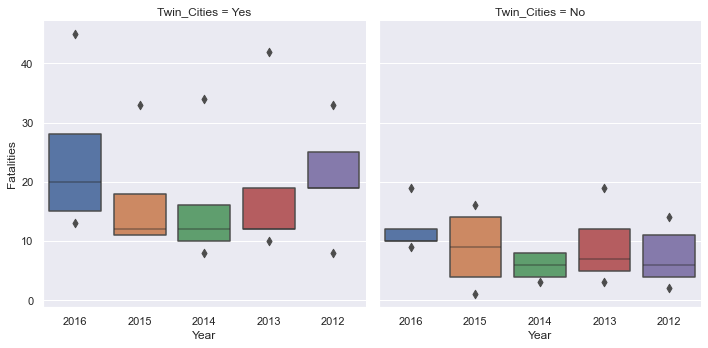

In [25]:
sns.catplot(x='Year', y='Fatalities', data=df_melted, col='Twin_Cities', kind='boxen')

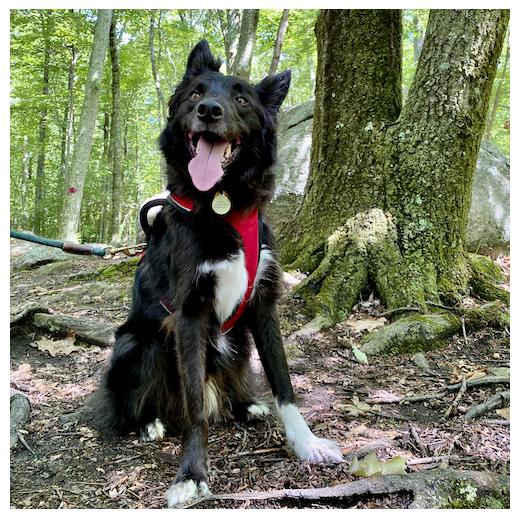

In [26]:
# Here's a little easter egg
sns.dogplot()